In [74]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
from sklearn.linear_model import LinearRegression

In [75]:
dataset = pd.read_csv('data/LinearRegressionData.csv')
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [76]:
dataset.shape

(20, 2)

In [77]:
X = dataset.iloc[:, :-1] #독립변수
y = dataset.iloc[:, -1] #종속변수

In [78]:
X

,hour
0,0.5
1,1.2
2,1.8
3,2.4
4,2.6
5,3.2
6,3.9
7,4.4
8,4.5
9,5.0


In [79]:
y

0      10
1       8
2      14
3      26
4      22
5      30
6      42
7      48
8      38
9      58
10     60
11     72
12     62
13     68
14     72
15     58
16     76
17     86
18     90
19    100
Name: score, dtype: int64

In [80]:
X = dataset.iloc[:, :-1].values #독립변수
y = dataset.iloc[:, -1].values #종속변수

In [81]:
X

array([[ 0.5],
       [ 1.2],
       [ 1.8],
       [ 2.4],
       [ 2.6],
       [ 3.2],
       [ 3.9],
       [ 4.4],
       [ 4.5],
       [ 5. ],
       [ 5.3],
       [ 5.8],
       [ 6. ],
       [ 6.1],
       [ 6.2],
       [ 6.9],
       [ 7.2],
       [ 8.4],
       [ 8.6],
       [10. ]])

In [82]:
X.shape

(20, 1)

In [83]:
y

array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
        68,  72,  58,  76,  86,  90, 100])

In [84]:
y.shape

(20,)

In [85]:
reg = LinearRegression()
reg.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [86]:
y_pred = reg.predict(X)

In [87]:
X

array([[ 0.5],
       [ 1.2],
       [ 1.8],
       [ 2.4],
       [ 2.6],
       [ 3.2],
       [ 3.9],
       [ 4.4],
       [ 4.5],
       [ 5. ],
       [ 5.3],
       [ 5.8],
       [ 6. ],
       [ 6.1],
       [ 6.2],
       [ 6.9],
       [ 7.2],
       [ 8.4],
       [ 8.6],
       [10. ]])

In [88]:
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

In [89]:
X, y_pred , y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
         26.93512734,  33.20134551,  40.51193337,  45.73378184,
         46.77815153,  52.        ,  55.13310908,  60.35495755,
         62.44369694,  63.48806663,  64.53243633,  71.84302419,
         74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]))

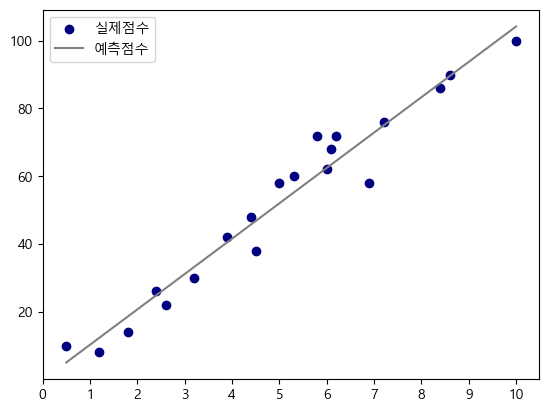

In [90]:
plt.scatter(X, y, color='navy', label='실제점수')
plt.plot(X, y_pred, color='gray', label='예측점수')
xticks = [x for x in range(11)]
plt.xticks(xticks)
plt.legend()
plt.show()

In [91]:
pred = reg.predict([[9]])
pred

array([93.77478776])

In [92]:
pred = reg.predict([[9], [7], [4]])
pred

array([93.77478776, 72.88739388, 41.55630306])

In [93]:
# y = mx + b 
m = reg.coef_
b = reg.intercept_
m, b

(array([10.44369694]), np.float64(-0.218484702867201))

In [94]:
y = m * 9 + b
y

array([93.77478776])

In [95]:
#선형회귀모델 생성함수

def model_linear():
    import pandas as pd
    from sklearn.linear_model import LinearRegression

    dataset = pd.read_csv('data/LinearRegressionData.csv')
    X = dataset.iloc[:, :-1].values
    y = dataset.iloc[:, -1].values

    reg = LinearRegression()
    reg.fit(X, y)
    return reg

In [96]:
model = model_linear()

In [97]:
model.predict([[9]])

array([93.77478776])

In [98]:
def predict(hour):
    model = model_linear()
    pred = model.predict([[hour]])
    print(f'{hour}시간 공부했을때 예상 점수: {pred[0]:.2f}')

In [99]:
predict(9)

9시간 공부했을때 예상 점수: 93.77


In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [102]:
X.shape, y.shape

((20, 1), (20,))

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape 

((16, 1), (16,), (4, 1), (4,))

In [104]:
X_train, X_test

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]))

In [105]:
reg= LinearRegression()
reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


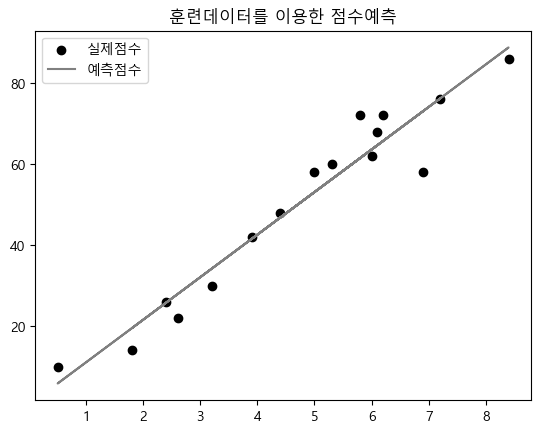

In [106]:
plt.scatter(X_train, y_train, label='실제점수', color='black')
plt.plot(X_train, reg.predict(X_train), label='예측점수', color = 'gray')
plt.legend()
plt.title('훈련데이터를 이용한 점수예측')
plt.show()

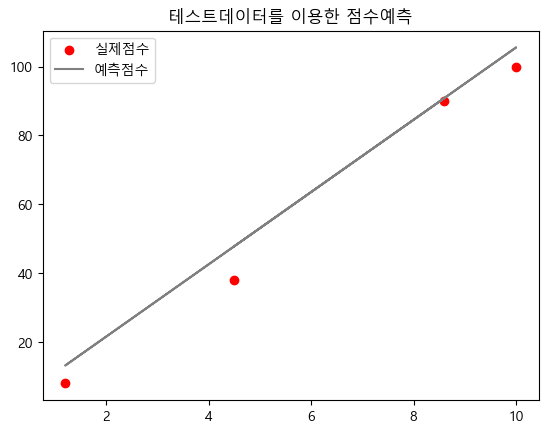

In [107]:
plt.scatter(X_test, y_test, label='실제점수', color='red')
plt.plot(X_test, reg.predict(X_test), label='예측점수', color = 'gray')
plt.legend()
plt.title('테스트데이터를 이용한 점수예측')
plt.show()

In [108]:
reg = LinearRegression()
reg.fit(X, y)
reg.score(X, y)

0.9531481530310588

In [110]:
reg = LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_train, y_train)

0.9356663661221668

In [111]:
reg = LinearRegression()
reg.fit(X_test, y_test)
reg.score(X_test, y_test)

0.9939502903988819

In [112]:
#확률적 경사하강법 모델링
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X_train , X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [113]:
from sklearn.linear_model import SGDRegressor
sr = SGDRegressor()
sr.fit(X_train, y_train)

,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


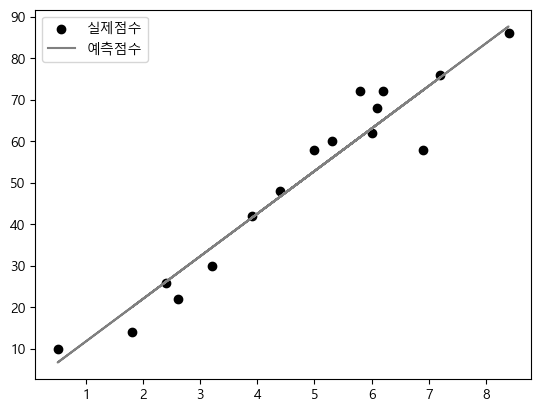

In [114]:
plt.scatter(X_train, y_train, label='실제점수', color='black')
plt.plot(X_train, sr.predict(X_train), label='예측점수', color='gray')
plt.legend()
plt.show()

In [115]:
# y = mx + b 
m = sr.coef_
b= sr.intercept_
m, b

(array([10.23697912]), array([1.64538436]))

In [116]:
from sklearn.linear_model import SGDRegressor
sr = SGDRegressor(max_iter=1000, eta0=0.001, random_state=0, verbose=1)
sr.fit(X_train, y_train)

-- Epoch 1
Norm: 2.40, NNZs: 1, Bias: 0.442470, T: 16, Avg. loss: 1181.034371
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 3.84, NNZs: 1, Bias: 0.697455, T: 32, Avg. loss: 754.011321
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 4.89, NNZs: 1, Bias: 0.881472, T: 48, Avg. loss: 520.842928
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 5.70, NNZs: 1, Bias: 1.023556, T: 64, Avg. loss: 374.527388
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 6.34, NNZs: 1, Bias: 1.137258, T: 80, Avg. loss: 277.717040
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 6.88, NNZs: 1, Bias: 1.230635, T: 96, Avg. loss: 210.603548
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 7.32, NNZs: 1, Bias: 1.308149, T: 112, Avg. loss: 162.433366
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 7.69, NNZs: 1, Bias: 1.372847, T: 128, Avg. loss: 127.468199
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 8.01, NNZs: 1, Bias: 1.427757, T: 144, Avg. loss: 101.814505
Total training time: 0.

,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,1
,epsilon,0.1
,random_state,0


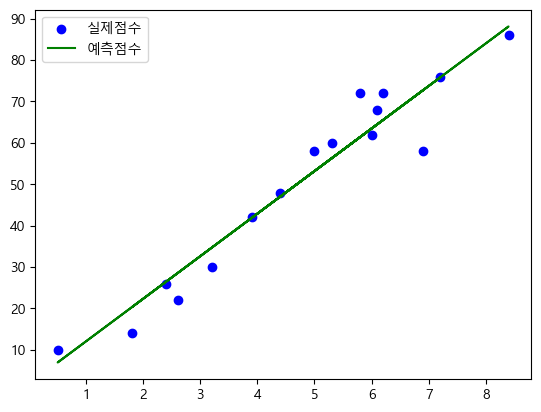

In [117]:
plt.scatter(X_train, y_train, label='실제점수', color='blue')
plt.plot(X_train, sr.predict(X_train), label='예측점수', color='green')
plt.legend()
plt.show()

In [118]:
from sklearn.linear_model import SGDRegressor
sr = SGDRegressor(max_iter=100, eta0=0.0001, random_state=0, verbose=1)
sr.fit(X_train, y_train)

-- Epoch 1
Norm: 0.27, NNZs: 1, Bias: 0.048869, T: 16, Avg. loss: 1484.241876
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.47, NNZs: 1, Bias: 0.083896, T: 32, Avg. loss: 1419.741822
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.64, NNZs: 1, Bias: 0.114272, T: 48, Avg. loss: 1367.983092
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.79, NNZs: 1, Bias: 0.141552, T: 64, Avg. loss: 1322.870279
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.94, NNZs: 1, Bias: 0.166772, T: 80, Avg. loss: 1282.550224
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.07, NNZs: 1, Bias: 0.190476, T: 96, Avg. loss: 1245.587071
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.20, NNZs: 1, Bias: 0.212877, T: 112, Avg. loss: 1211.227118
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 1.32, NNZs: 1, Bias: 0.234194, T: 128, Avg. loss: 1179.037565
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 1.43, NNZs: 1, Bias: 0.254556, T: 144, Avg. loss: 1148.814106
Total training 

c:\Users\AIPM2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,100
,tol,0.001
,shuffle,True
,verbose,1
,epsilon,0.1
,random_state,0


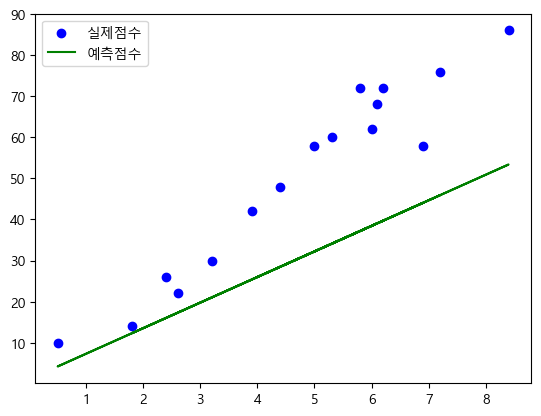

In [119]:
plt.scatter(X_train, y_train, label='실제점수', color='blue')
plt.plot(X_train, sr.predict(X_train), label='예측점수', color='green')
plt.legend()
plt.show()

In [120]:
import warnings
warnings.filterwarnings('ignore')

In [121]:
iter = [100, 150, 200, 1000]
eta0 = 0.0001 #1e-4
models = []
for i in iter:
    sr = SGDRegressor(max_iter=i, eta0=eta0, random_state=0)
    sr.fit(X_train, y_train)
    models.append(sr)

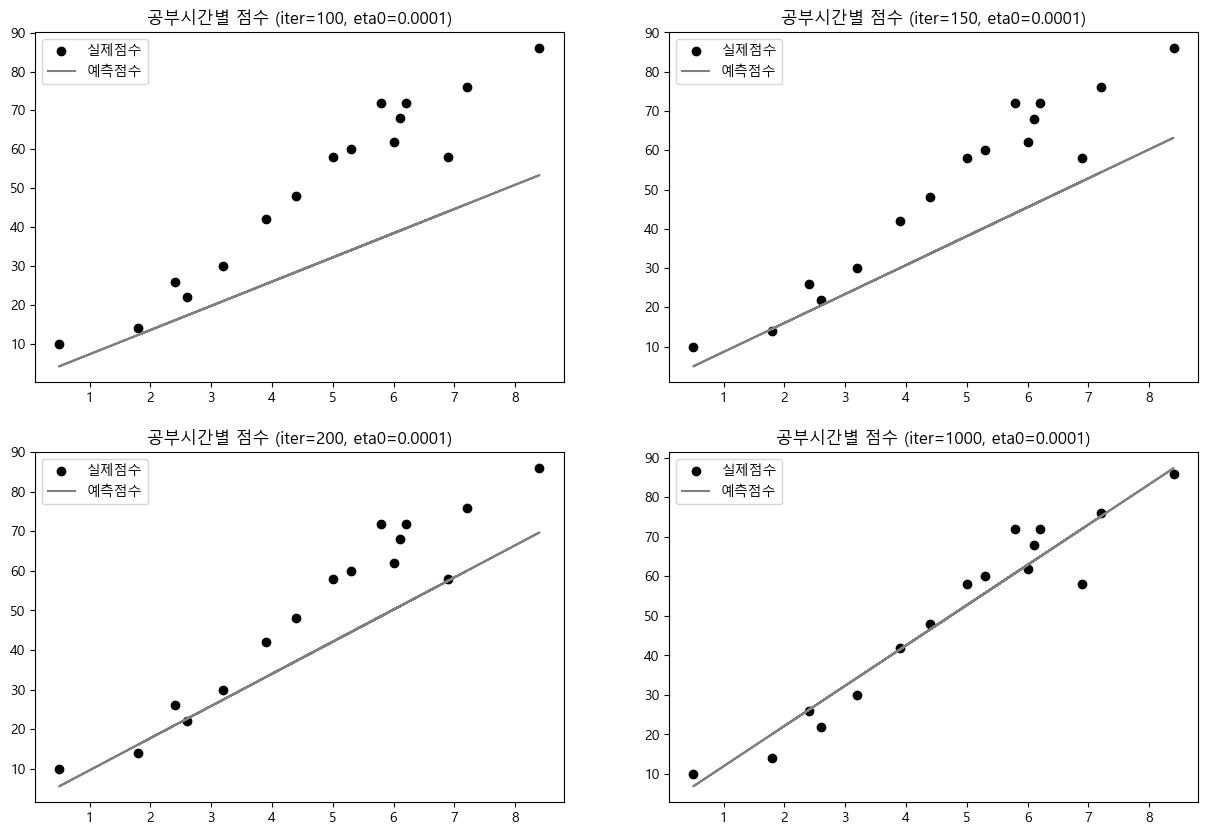

In [129]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs[0,0].scatter(X_train, y_train, label='실제점수', color='black')
axs[0,0].plot(X_train, models[0].predict(X_train), label='예측점수', color='gray')
axs[0,0].legend()
axs[0,0].set_title(f'공부시간별 점수 (iter={iter[0]}, eta0={eta0})')

axs[0,1].scatter(X_train, y_train, label='실제점수', color='black')
axs[0,1].plot(X_train, models[1].predict(X_train), label='예측점수', color='gray')
axs[0,1].legend()
axs[0,1].set_title(f'공부시간별 점수 (iter={iter[1]}, eta0={eta0})')

axs[1,0].scatter(X_train, y_train, label='실제점수', color='black')
axs[1,0].plot(X_train, models[2].predict(X_train), label='예측점수', color='gray')
axs[1,0].legend()
axs[1,0].set_title(f'공부시간별 점수 (iter={iter[2]}, eta0={eta0})')

axs[1,1].scatter(X_train, y_train, label='실제점수', color='black')
axs[1,1].plot(X_train, models[3].predict(X_train), label='예측점수', color='gray')
axs[1,1].legend()
axs[1,1].set_title(f'공부시간별 점수 (iter={iter[3]}, eta0={eta0})')


plt.show()

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

In [134]:
dataset = pd.read_csv('data/LinearRegressionData.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [135]:
reg = LinearRegression()
reg.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [136]:
sr = SGDRegressor()
sr.fit(X, y)

,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


In [137]:
reg.score(X, y), sr.score(X, y)

(0.162176237140369, 0.09227172477576784)

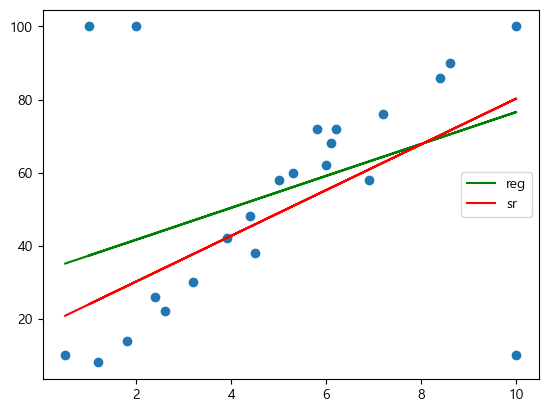

In [140]:
plt.scatter(X, y)
plt.plot(X, reg.predict(X), label='reg', color='green')
plt.plot(X, sr.predict(X), label='sr', color='red')
plt.legend()
plt.show()